In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.patches import Rectangle
import seaborn as sns

# 한글 폰트 설치 및 경로 설정
font_location = 'C:/Windows/Fonts/malgun.ttf'  # 한글 폰트 경로 설정
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [11]:
df=pd.read_pickle('./wafer_data.pkl')

In [18]:
df

,웨이퍼맵,웨이퍼크기,lotName,trianTestLabel,불량유형
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683,lot1,Training,none
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683,lot1,Training,none
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683,lot1,Training,none
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683,lot1,Training,none
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683,lot1,Training,none
...,...,...,...,...,...
172945,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600,lot47542,Test,Edge-Loc
172946,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600,lot47542,Test,Edge-Loc
172947,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600,lot47542,Test,Edge-Ring
172948,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600,lot47542,Test,Edge-Loc


In [15]:
df['불량유형'] = df['불량유형'].astype(str).str.strip().str.replace('[','').str.replace(']','').str.replace('\'','')

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_3644\1837991478.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['불량유형'] = df['불량유형'].astype(str).str.strip().str.replace('[','').str.replace(']','').str.replace('\'','')


In [17]:
df['trianTestLabel'] = df['trianTestLabel'].astype(str).str.strip().str.replace('[','').str.replace(']','').str.replace('\'','')

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_3644\2141741740.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['trianTestLabel'] = df['trianTestLabel'].astype(str).str.strip().str.replace('[','').str.replace(']','').str.replace('\'','')


In [4]:
print(df['trianTestLabel'].value_counts())

[[Test]]        118595
[[Training]]     54355
Name: trianTestLabel, dtype: int64


In [28]:
print(df['불량유형'].value_counts())

Series([], Name: 불량유형, dtype: int64)


In [6]:
df1=df['웨이퍼크기'].value_counts

In [7]:
df1

<bound method IndexOpsMixin.value_counts of 0         1683
1         1683
2         1683
3         1683
4         1683
          ... 
172945     600
172946     600
172947     600
172948     600
172949     600
Name: 웨이퍼크기, Length: 172950, dtype: int32>

In [8]:
print((df['웨이퍼크기'].unique()))

[ 1683  2460   533  3298  1956  1091  1620  1812  1181  1176  3703  1724
  1413   938  1393  3729   899  5258  3002  2979  2986  2962  2990   635
  2993  2989  3001  3012  2995  1320  1304  7874  1769   939  1513  1032
  1806  1397   514   520   693   741   904  2268   844   776  1522   846
   712  3036   924   710  1075  3927   515  6295  1349   600   674  1253
  6065  1977  3004  1801  3031  3030  5342  2393   607   986  1623  3879
  5085  2227  1799  2007  8065  5082  1800  1786  1796  1507  1793  1797
  1790  1791  1792  1789  1784  1795  3532   682  4432 12552  1129   718
  1557   627  1565  1187  2422  2529  2699  1798   928  3695   990   736
  1844  2923  6328  1264  1109  4188  3895   845   843   836  1287  3522
  1291   572  1126  3134  3029  2375  2469   980  2278  1298  1299  1297
  1464  1044  2083  2006   811  1145  1154   614  2937  5133  4987  4020
  2765   661  2340 14116  1267   798  1485  3203  1250  3605  2121  1013
  1746  1106   638  3632  1233  2170  3601  2000  1

In [9]:
count_1683 = df['웨이퍼크기'].value_counts()[1683]
print(count_1683)

100


In [10]:
불량유형={'Center':0,'Donut':1,'Edge-Loc':2,'Edge-Ring':3,'Loc':4,'Random':5,'Scratch':6,'Near-full':7,'none':8}

In [11]:
trianTestLabel={'Training':0,'Test':1}

In [29]:
print(df['불량유형'].value_counts())

Series([], Name: 불량유형, dtype: int64)


In [13]:
tol_wafers = df.shape[0]
tol_wafers

172950

Text(0.5, 0, '불량유형')

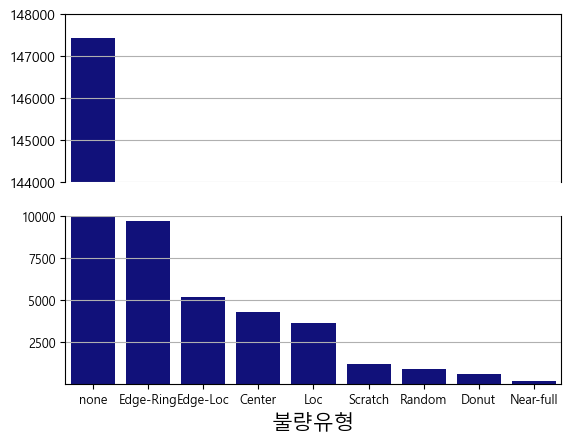

In [187]:
import matplotlib.pyplot as plt
data = pd.DataFrame({"불량유형":['none', 'Edge-Ring', 'Edge-Loc', 'Center', 'Loc', 'Scratch', 'Random', 'Donut', 'Near-full'],

"counts" : [147431, 9680, 5189, 4294, 3593, 1193, 866, 555, 149]})


# 데이터 설정

f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True)

ax1.yaxis.grid()
ax2.yaxis.grid()

ax1 = sns.barplot(x = '불량유형', y= "counts", data = data,  palette = ["darkblue"], ax=ax1)
ax2 = sns.barplot(x = '불량유형', y= "counts", data = data,  palette = ["darkblue"], ax=ax2)

plt.xticks(size = 9)
plt.yticks(size = 9)




ax2.set_ylim(0, 10000)
ax1.set_ylim(144000, 148000)

ax1.set_yticks([144000, 145000, 146000, 147000, 148000])
ax2.set_yticks([2500, 5000, 7500, 10000])

ax1.set_ylabel("")
ax2.set_ylabel("")

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)


ax1.get_xaxis().set_visible(False)



ax1.set_xlabel("")
ax2.set_xlabel("불량유형", fontsize = "15")





# 불량유형 별 많이 나오는 웨이퍼 크기

In [ ]:
## 수가 너무 많아서 개수가 작은 값들은 other로 묶음

In [36]:
new_df = df[['웨이퍼크기', '불량유형']]

In [37]:
new_df

,웨이퍼크기,불량유형
0,1683,none
1,1683,none
2,1683,none
3,1683,none
4,1683,none
...,...,...
172945,600,Edge-Loc
172946,600,Edge-Loc
172947,600,Edge-Ring
172948,600,Edge-Loc


In [110]:
Center = new_df[new_df.불량유형.str.contains('Center', case=False)]
Center

,웨이퍼크기,불량유형
43,2460,Center
47,2460,Center
543,533,Center
645,533,Center
783,533,Center
...,...,...
171587,600,Center
171625,600,Center
171844,600,Center
172138,600,Center


In [111]:
Center.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4294 entries, 43 to 172935
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   웨이퍼크기   4294 non-null   int32 
 1   불량유형    4294 non-null   object
dtypes: int32(1), object(1)
memory usage: 83.9+ KB


In [112]:
wafer_size = Center['웨이퍼크기']
wafer_size.value_counts().index

Int64Index([ 515,  904, 1226,  733, 1109,  533, 1389, 1485,  939, 1080,
            ...
            4143, 2570, 1338, 2582, 2937, 1804, 2071, 4672, 6052, 4556],
           dtype='int64', length=137)

In [122]:
sorted_sizes = Center['웨이퍼크기'].value_counts()
sorted_sizes

515     2192
904      246
1226     173
733      161
1109     148
        ... 
1804       1
2071       1
4672       1
6052       1
4556       1
Name: 웨이퍼크기, Length: 137, dtype: int64

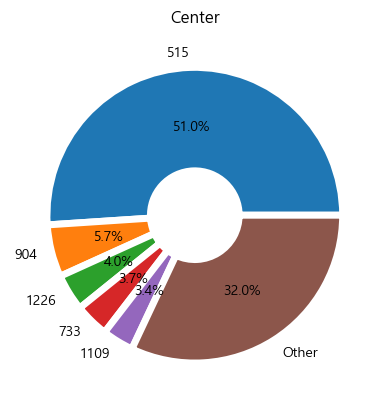

In [150]:
wafer_size_counts = Center['웨이퍼크기'].value_counts()
other_count = wafer_size_counts[wafer_size_counts < 100].sum()

wafer_size_counts = wafer_size_counts[wafer_size_counts >= 100]
wafer_size_counts['Other'] = other_count

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(wafer_size_counts, labels=wafer_size_counts.index, autopct='%1.1f%%', wedgeprops=wedgeprops)
plt.title('Center')
plt.show()
# 파이차트 그리기


In [46]:
Donut = new_df[new_df.불량유형.str.contains('Donut', case=False)]

In [47]:
Donut

,웨이퍼크기,불량유형
6492,1091,Donut
6507,1620,Donut
6508,1620,Donut
6509,1620,Donut
6510,1620,Donut
...,...,...
145191,1414,Donut
162755,562,Donut
162779,562,Donut
167300,1060,Donut


In [152]:
wafer_size2 = Donut['웨이퍼크기'].value_counts()
wafer_size2.head(10)

1334    234
845      44
1080     33
844      28
1748     23
1109     17
843      14
1376     12
3134     11
2628      9
Name: 웨이퍼크기, dtype: int64

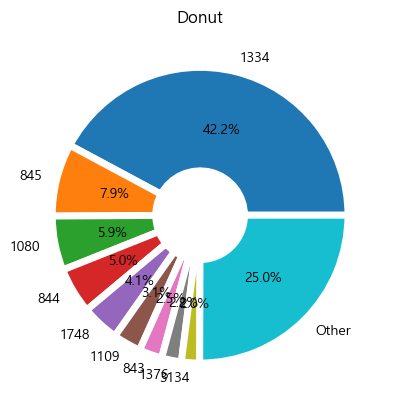

In [153]:
wafer_size_counts2 = Donut['웨이퍼크기'].value_counts()
other_count2 = wafer_size_counts2[wafer_size_counts2 < 10].sum()

wafer_size_counts2 = wafer_size_counts2[wafer_size_counts2 >= 10]
wafer_size_counts2['Other'] = other_count2

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(wafer_size_counts2, labels=wafer_size_counts2.index, autopct='%1.1f%%', wedgeprops=wedgeprops)
plt.title('Donut')
plt.show()

In [49]:
Edge_Loc = new_df[new_df.불량유형.str.contains('Edge-Loc', case=False)]

In [50]:
Edge_Loc

,웨이퍼크기,불량유형
35,2460,Edge-Loc
36,2460,Edge-Loc
37,2460,Edge-Loc
38,2460,Edge-Loc
40,2460,Edge-Loc
...,...,...
172941,600,Edge-Loc
172942,600,Edge-Loc
172945,600,Edge-Loc
172946,600,Edge-Loc


In [154]:
wafer_size3 = Edge_Loc['웨이퍼크기'].value_counts()
wafer_size3.head(20)

1376    391
1109    359
776     306
533     289
516     254
562     228
710     181
1801    160
939     156
600     153
518     144
846     132
1060    130
741     130
1129    113
515     100
845      99
2367     87
1414     82
1080     82
Name: 웨이퍼크기, dtype: int64

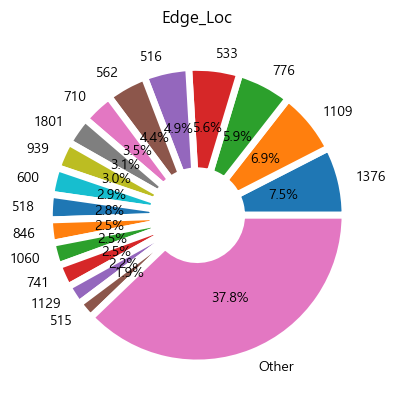

In [163]:
wafer_size_counts3= Edge_Loc['웨이퍼크기'].value_counts()
other_count3= wafer_size_counts3[wafer_size_counts3< 100].sum()

wafer_size_counts3= wafer_size_counts3[wafer_size_counts3>= 100]
wafer_size_counts3['Other'] = other_count3

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(wafer_size_counts3, labels=wafer_size_counts3.index, autopct='%1.1f%%', wedgeprops=wedgeprops)
plt.title('Edge_Loc')
plt.show()

In [53]:
Edge_Ring = new_df[new_df.불량유형.str.contains('Edge-Ring', case=False)]
Edge_Ring

,웨이퍼크기,불량유형
97,2460,Edge-Ring
173,533,Edge-Ring
3017,533,Edge-Ring
4025,533,Edge-Ring
4285,533,Edge-Ring
...,...,...
172936,600,Edge-Ring
172939,600,Edge-Ring
172943,600,Edge-Ring
172947,600,Edge-Ring


In [164]:
wafer_size4 = Edge_Ring['웨이퍼크기'].value_counts()
wafer_size4.head(20)

1075     2046
2126     1519
3036     1420
3927      483
12662     463
1658      443
1421      373
1291      335
1999      249
2085      135
600       119
4479      100
2765      100
1129       97
5815       94
518        78
2734       75
2742       68
2513       66
562        63
Name: 웨이퍼크기, dtype: int64

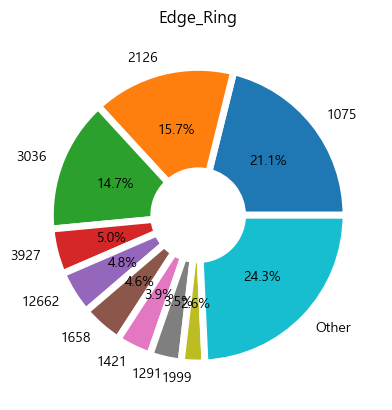

In [166]:
wafer_size_counts4= Edge_Ring['웨이퍼크기'].value_counts()
other_count4= wafer_size_counts4[wafer_size_counts4< 136].sum()

wafer_size_counts4= wafer_size_counts4[wafer_size_counts4>= 136]
wafer_size_counts4['Other'] = other_count4

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(wafer_size_counts4, labels=wafer_size_counts4.index, autopct='%1.1f%%', wedgeprops=wedgeprops)
plt.title('Edge_Ring')
plt.show()

In [55]:
Loc = new_df[new_df.불량유형.str.contains('Loc', case=False)]
Loc

,웨이퍼크기,불량유형
19,1683,Loc
35,2460,Edge-Loc
36,2460,Edge-Loc
37,2460,Edge-Loc
38,2460,Edge-Loc
...,...,...
172941,600,Edge-Loc
172942,600,Edge-Loc
172945,600,Edge-Loc
172946,600,Edge-Loc


In [61]:
df_loc = Loc[~Loc['불량유형'].str.contains('Edge-Loc')]
df_loc

,웨이퍼크기,불량유형
19,1683,Loc
39,2460,Loc
45,2460,Loc
70,2460,Loc
578,533,Loc
...,...,...
172746,600,Loc
172750,600,Loc
172812,600,Loc
172820,600,Loc


In [167]:
wafer_size5 = df_loc['웨이퍼크기'].value_counts()
wafer_size5.head(20)

533     297
776     241
939     183
516     157
518     152
1109    126
845     109
741     107
562     101
1080    101
1376    101
1129     96
904      91
844      81
1334     80
1060     70
710      63
2393     57
1534     54
600      48
Name: 웨이퍼크기, dtype: int64

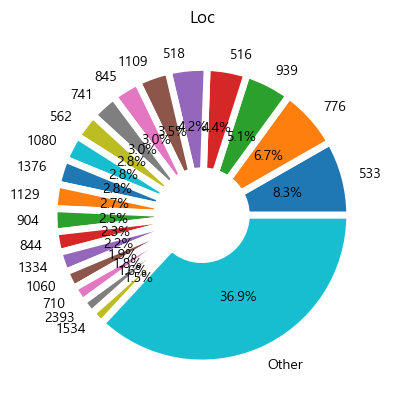

In [172]:
wafer_size_counts5= df_loc['웨이퍼크기'].value_counts()
other_count5= wafer_size_counts5[wafer_size_counts5< 50].sum()

wafer_size_counts5= wafer_size_counts5[wafer_size_counts5>= 50]
wafer_size_counts5['Other'] = other_count5

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(wafer_size_counts5, labels=wafer_size_counts5.index, autopct='%1.1f%%', wedgeprops=wedgeprops)
plt.title('Loc')
plt.show()

In [63]:
Random = new_df[new_df.불량유형.str.contains('Random', case=False)]
Random

,웨이퍼크기,불량유형
541,533,Random
860,533,Random
1042,533,Random
1347,533,Random
1484,533,Random
...,...,...
169382,1060,Random
171765,600,Random
171890,600,Random
172358,600,Random


In [173]:
wafer_size6 = Random['웨이퍼크기'].value_counts()
wafer_size6.head(20)

1349    124
1638     79
533      74
1080     68
516      36
1109     31
518      30
1334     26
865      24
904      23
1139     22
1485     21
1421     18
776      18
712      17
515      17
811      16
710      15
980      13
1376     13
Name: 웨이퍼크기, dtype: int64

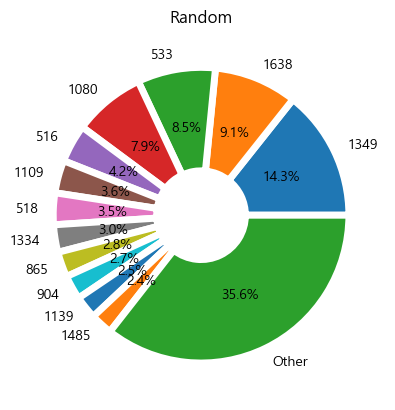

In [175]:
wafer_size_counts6= Random['웨이퍼크기'].value_counts()
other_count6= wafer_size_counts6[wafer_size_counts6< 20].sum()

wafer_size_counts6= wafer_size_counts6[wafer_size_counts6>= 20]
wafer_size_counts6['Other'] = other_count6

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(wafer_size_counts6, labels=wafer_size_counts6.index, autopct='%1.1f%%', wedgeprops=wedgeprops)
plt.title('Random')
plt.show()

In [65]:
Scratch = new_df[new_df.불량유형.str.contains('Scratch', case=False)]
Scratch

,웨이퍼크기,불량유형
130,2460,Scratch
538,533,Scratch
657,533,Scratch
1374,533,Scratch
2175,533,Scratch
...,...,...
172857,600,Scratch
172860,600,Scratch
172861,600,Scratch
172918,600,Scratch


In [ ]:
wafer_size7 = Scratch['웨이퍼크기'].value_counts()
wafer_size7.head(20)

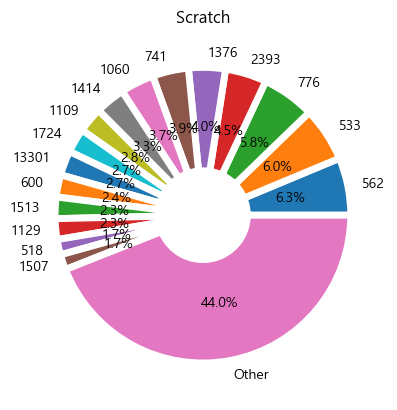

In [176]:
wafer_size_counts7= Scratch['웨이퍼크기'].value_counts()
other_count7= wafer_size_counts7[wafer_size_counts7< 20].sum()

wafer_size_counts7= wafer_size_counts7[wafer_size_counts7>= 20]
wafer_size_counts7['Other'] = other_count7

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(wafer_size_counts7, labels=wafer_size_counts7.index, autopct='%1.1f%%', wedgeprops=wedgeprops)
plt.title('Scratch')
plt.show()

In [68]:
Near_full = new_df[new_df.불량유형.str.contains('Near-full', case=False)]
Near_full

,웨이퍼크기,불량유형
814,533,Near-full
1908,533,Near-full
2740,533,Near-full
3101,533,Near-full
3502,533,Near-full
...,...,...
170717,1060,Near-full
170768,1060,Near-full
171611,600,Near-full
171943,600,Near-full


In [177]:
wafer_size8 = Near_full['웨이퍼크기'].value_counts()
wafer_size8.head(20)

741     28
516     21
533     16
1109    15
518     11
1139     9
776      5
562      5
1060     4
904      3
600      3
592      2
549      2
1724     2
895      2
953      2
1075     2
1389     2
1442     2
3703     1
Name: 웨이퍼크기, dtype: int64

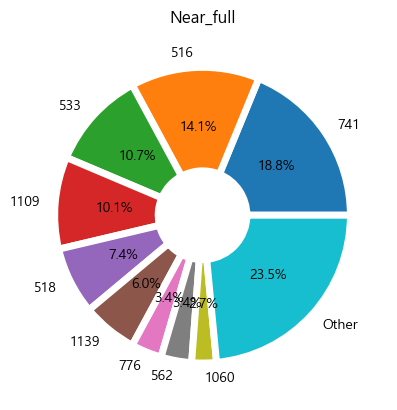

In [184]:
wafer_size_counts8= Near_full['웨이퍼크기'].value_counts()
other_count8= wafer_size_counts8[wafer_size_counts8< 4].sum()

wafer_size_counts8= wafer_size_counts8[wafer_size_counts8>= 4]
wafer_size_counts8['Other'] = other_count8

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(wafer_size_counts8, labels=wafer_size_counts8.index, autopct='%1.1f%%', wedgeprops=wedgeprops)
plt.title('Near_full')
plt.show()